# 📈 Análise Exploratória de Dados (EDA)

## 🎯 Objetivo
Descobrir padrões, tendências e insights através de análise estatística descritiva e visualizações informativas.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Load the cleaned GitHub repositories dataset
df = pd.read_csv('../dados/github_repos_limpo.csv')
df.head(2)  # Display the first two rows of the dataset

,name,owner,stars,forks,language,created_at,updated_at,size_kb,open_issues,owner_type,owner_public_repos,subscribers_count,last_year_commits,contributors,closed_issues,pull_requests
0,free-programming-books,EbookFoundation,359735,63576,Python,2013-10-11 06:50:37+00:00,2025-06-21 02:09:07+00:00,19483,45,Organization,37,5000,339,432,129,15
1,public-apis,public-apis,351991,37004,Python,2016-03-20 23:49:42+00:00,2025-06-21 02:06:40+00:00,4771,492,Organization,1,4316,5,427,159,490


## 📊 Análise de Frequência de Dados Categóricos

### Distribuição de Tipos de Proprietários
Investigação da composição entre usuários individuais e organizações.

**Insights Esperados:**
- Proporção de projetos individuais vs. corporativos
- Padrões de contribuição por tipo de proprietário
- Diferenças em popularidade e escala

### Distribuição de Linguagens de Programação
Análise da representatividade das diferentes tecnologias no dataset.

**Visualizações:**
- Gráfico de barras com frequências absolutas
- Identificação de linguagens dominantes
- Padrões de adoção tecnológica

### Top Organizações Contribuidoras
Identificação das organizações mais ativas no ecossistema open-source.

**Métricas:**
- Ranking por número de repositórios
- Análise de concentração de contribuições
- Mapeamento de players principais

In [22]:
df_copy = df.copy()

In [4]:
# Identify all categorical columns in the dataset
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
categorical_columns

['name', 'owner', 'language', 'created_at', 'updated_at', 'owner_type']

In [5]:
# Display the frequency of each unique value for all categorical columns
for col in categorical_columns:
    print(f'{col}')
    print(df[col].value_counts())
    print('\n')

# Owner type, owner, and language are the key categorical columns

name
name
android        10
server          4
goproxy         3
aliyunpan       3
hydra           3
               ..
aircrack-ng     1
kphp-kdb        1
nanomsg         1
ly              1
HP-Socket       1
Name: count, Length: 7729, dtype: int64


owner
owner
google            65
apache            54
microsoft         46
alibaba           31
JetBrains         21
                  ..
AlexeyBelezeko     1
kaandedeoglu       1
radex              1
MarioIannotta      1
slazyk             1
Name: count, Length: 6200, dtype: int64


language
language
Kotlin        983
Swift         981
C             955
Rust          928
Java          909
Go            875
TypeScript    770
JavaScript    762
Python        721
Name: count, dtype: int64


created_at
created_at
2018-05-21 16:48:59+00:00    1
2024-02-22 20:53:54+00:00    1
2021-04-12 15:18:15+00:00    1
2024-01-29 05:30:33+00:00    1
2018-06-29 21:59:26+00:00    1
                            ..
2017-05-05 07:28:13+00:00    1
2023-03-08 14:53:4

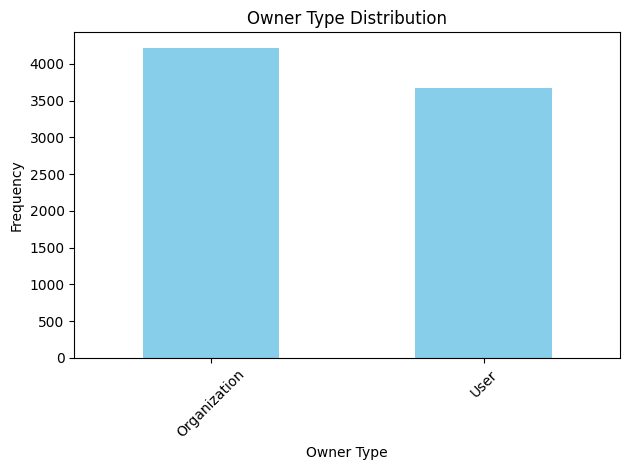

In [6]:
# Plot the distribution of the owner types (User vs. Organization)
df['owner_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Owner Type Distribution')
plt.xlabel('Owner Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

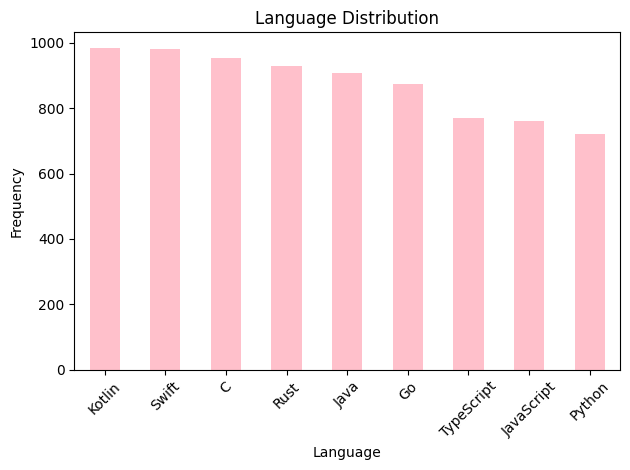

In [7]:
# Plot the distribution of programming languages used in the repositories
df['language'].value_counts().plot(kind='bar', color='pink')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Filter the owners where the owner type is 'Organization'
organizations = df[df['owner_type'] == 'Organization']['owner']
organizations.value_counts()

owner
google             65
apache             54
microsoft          46
alibaba            31
JetBrains          21
                   ..
ProxymanApp         1
SwiftyJSON          1
PopcornTimeTV       1
imaginary-cloud     1
ProfileCreator      1
Name: count, Length: 3065, dtype: int64

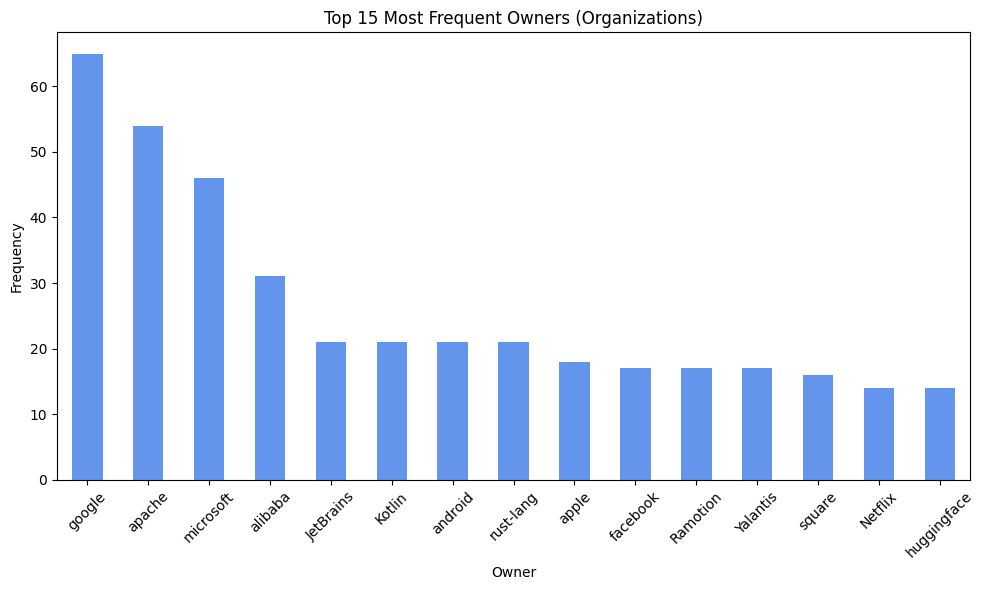

In [9]:
# Plot the top 15 most frequent organization owners
plt.figure(figsize=(10, 6))

organizations.value_counts().head(15).plot(kind='bar', color='cornflowerblue')
plt.title('Top 15 Most Frequent Owners (Organizations)')
plt.xlabel('Owner')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🔢 Estatística Descritiva de Dados Numéricos

### Medidas de Tendência Central
Análise de posição para cada variável numérica.

**Métricas Calculadas:**
- **Média:** Valor central considerando todos os dados
- **Mediana:** Valor que divide os dados ao meio (resistente a outliers)

**Visualizações:**
- Histogramas com curva de densidade (KDE)
- Linhas de referência para média e mediana
- Comparação visual entre as medidas

### Medidas de Dispersão
Análise da variabilidade e spread dos dados.

**Estatísticas Computadas:**
- **Desvio Padrão:** Dispersão em relação à média
- **Variância:** Quadrado do desvio padrão
- **Amplitude:** Diferença entre máximo e mínimo
- **Quartis e IQR:** Medidas robustas de dispersão

**Visualizações:**
- Boxplots para identificação de outliers
- Análise visual da distribuição
- Detecção de assimetrias

In [10]:
# Identify all numerical columns in the dataset
numerical_columns = df.select_dtypes(include=['int64']).columns.to_list()
numerical_columns

['stars',
 'forks',
 'size_kb',
 'open_issues',
 'owner_public_repos',
 'subscribers_count',
 'last_year_commits',
 'contributors',
 'closed_issues',
 'pull_requests']

### Posição


--- stars ---
Mean: 11388.61
Median: 6779.00


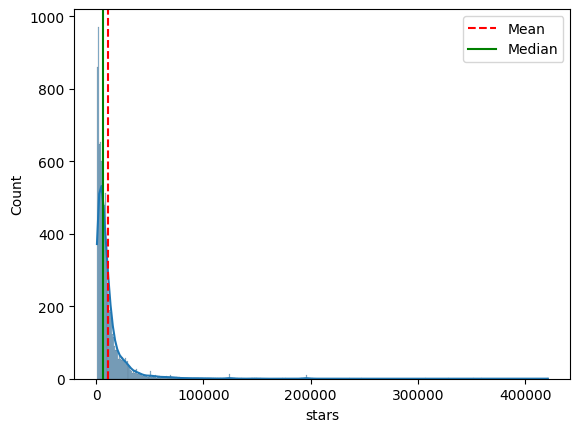


--- forks ---
Mean: 1740.53
Median: 716.00


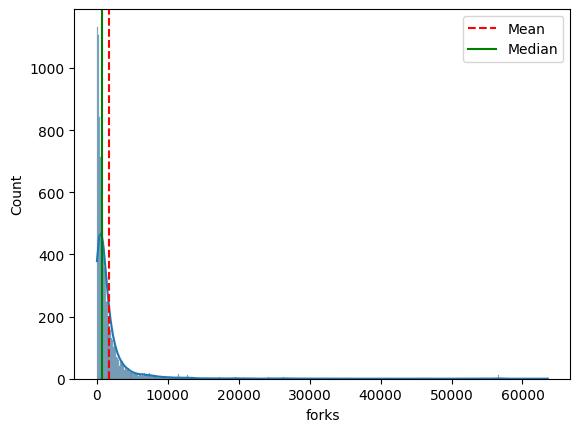


--- size_kb ---
Mean: 123679.48
Median: 14703.00


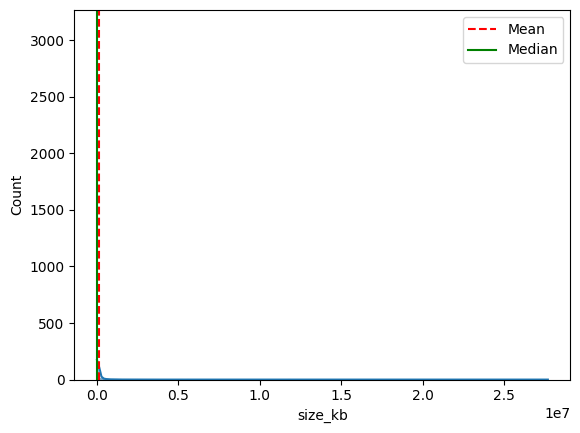


--- open_issues ---
Mean: 222.41
Median: 73.00


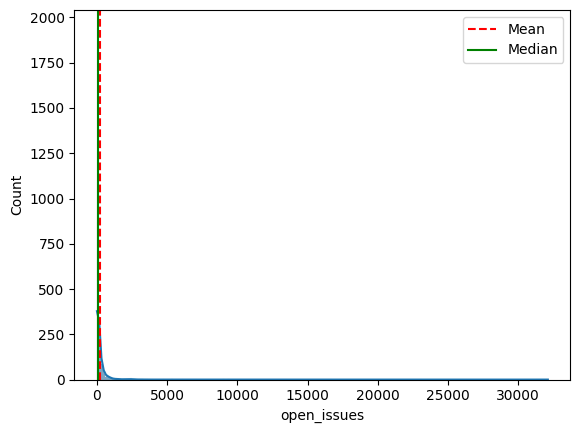


--- owner_public_repos ---
Mean: 174.68
Median: 38.00


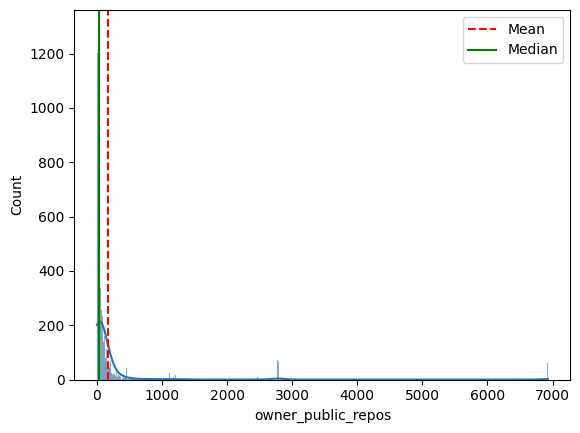


--- subscribers_count ---
Mean: 217.73
Median: 106.00


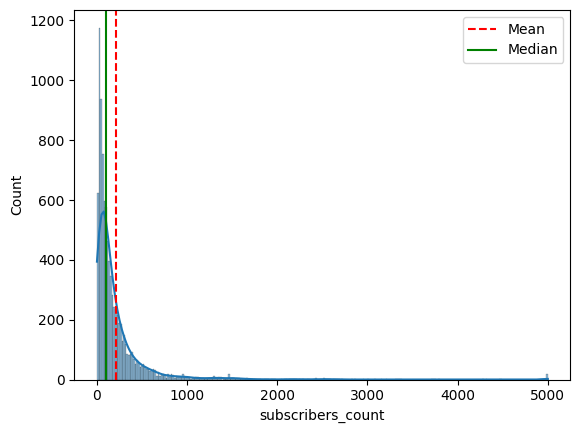


--- last_year_commits ---
Mean: 467.23
Median: 25.00


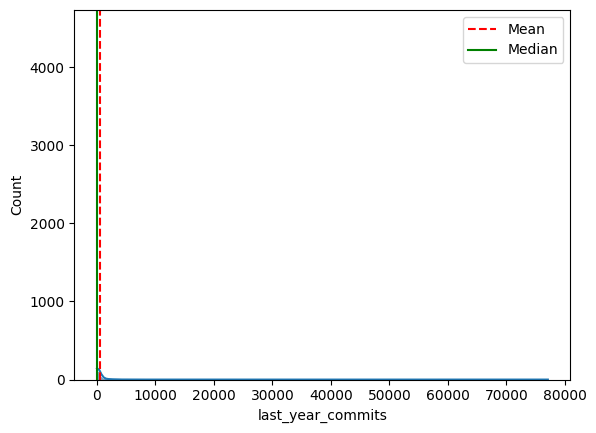


--- contributors ---
Mean: 93.10
Median: 43.00


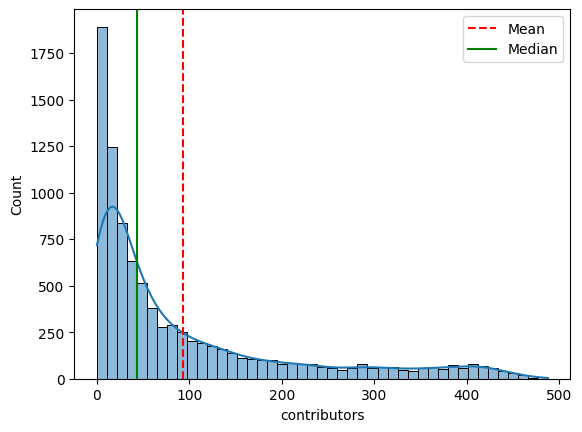


--- closed_issues ---
Mean: 154.76
Median: 13.00


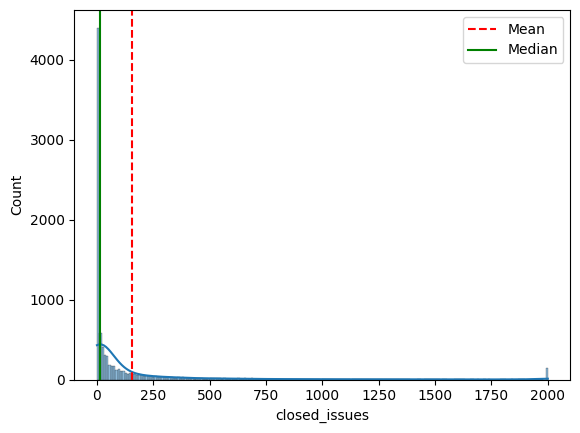


--- pull_requests ---
Mean: 28.68
Median: 8.00


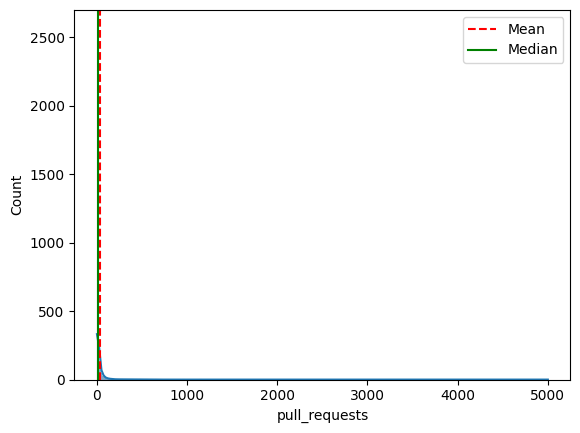

In [27]:
# For each numerical column, calculate and plot the mean and median
for col in numerical_columns:
    print(f"\n--- {col} ---")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    
    # Plot histogram with KDE for distribution
    sns.histplot(df[col], kde=True)
    
    # Add mean and median lines
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='g', linestyle='-', label='Median')
    plt.legend()
    plt.show()

### Dispersão


--- stars ---
Standard Deviation: 18230.48
Variance: 332350465.77
Minimum: 773
Maximum: 421248
Range: 420475
1st Quartile (Q1): 3146.0
3rd Quartile (Q3): 12459.0
IQR (Interquartile Range): 9313.0


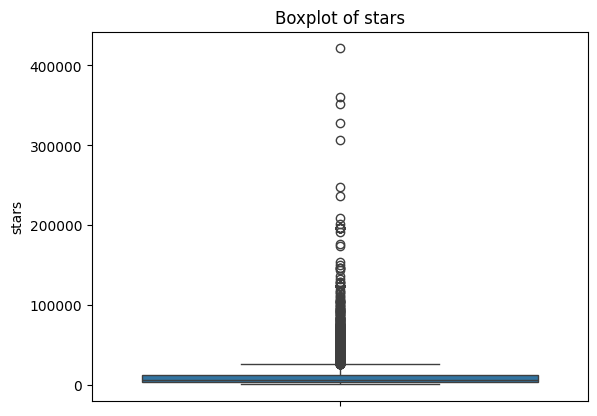


--- forks ---
Standard Deviation: 4020.16
Variance: 16161684.11
Minimum: 4
Maximum: 63576
Range: 63572
1st Quartile (Q1): 279.0
3rd Quartile (Q3): 1693.0
IQR (Interquartile Range): 1414.0


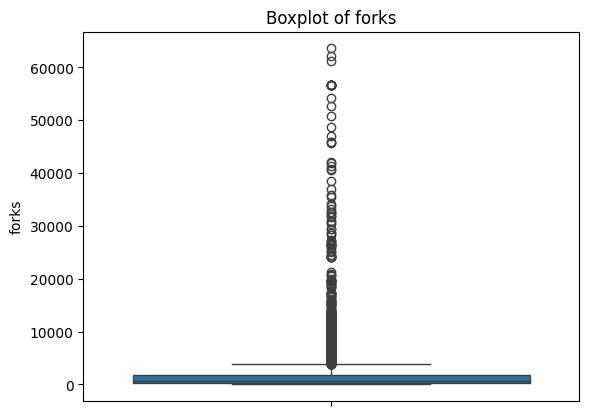


--- size_kb ---
Standard Deviation: 634567.11
Variance: 402675417747.30
Minimum: 0
Maximum: 27683251
Range: 27683251
1st Quartile (Q1): 3490.0
3rd Quartile (Q3): 66308.0
IQR (Interquartile Range): 62818.0


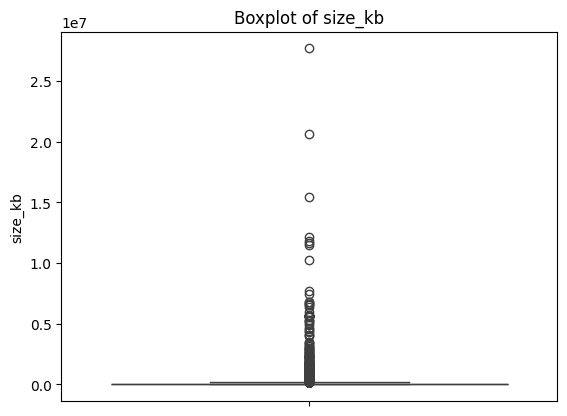


--- open_issues ---
Standard Deviation: 650.72
Variance: 423431.47
Minimum: 0
Maximum: 32117
Range: 32117
1st Quartile (Q1): 23.0
3rd Quartile (Q3): 213.0
IQR (Interquartile Range): 190.0


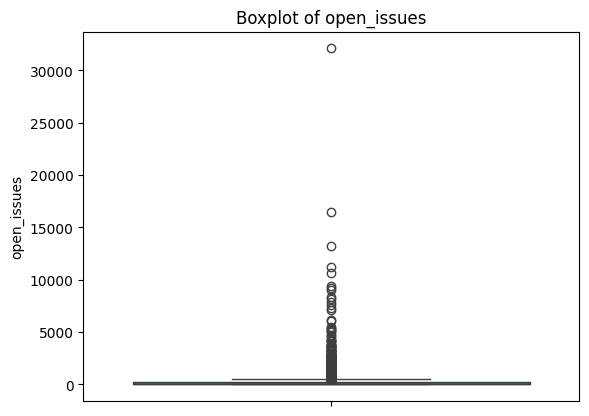


--- owner_public_repos ---
Standard Deviation: 666.16
Variance: 443770.43
Minimum: 0
Maximum: 6928
Range: 6928
1st Quartile (Q1): 14.0
3rd Quartile (Q3): 95.0
IQR (Interquartile Range): 81.0


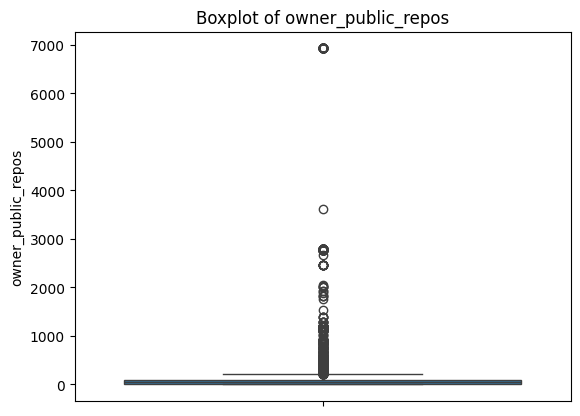


--- subscribers_count ---
Standard Deviation: 394.28
Variance: 155457.65
Minimum: 1
Maximum: 5000
Range: 4999
1st Quartile (Q1): 46.0
3rd Quartile (Q3): 236.0
IQR (Interquartile Range): 190.0


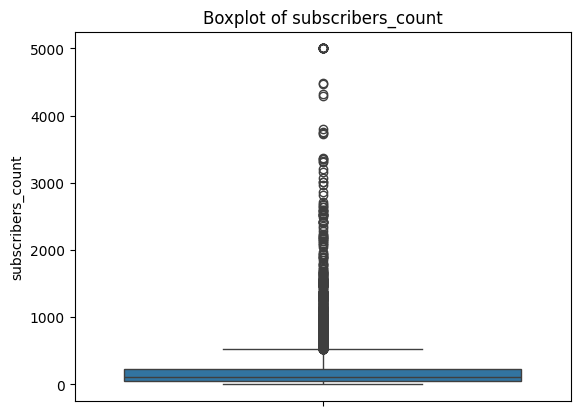


--- last_year_commits ---
Standard Deviation: 3012.70
Variance: 9076376.42
Minimum: 0
Maximum: 77090
Range: 77090
1st Quartile (Q1): 0.0
3rd Quartile (Q3): 241.0
IQR (Interquartile Range): 241.0


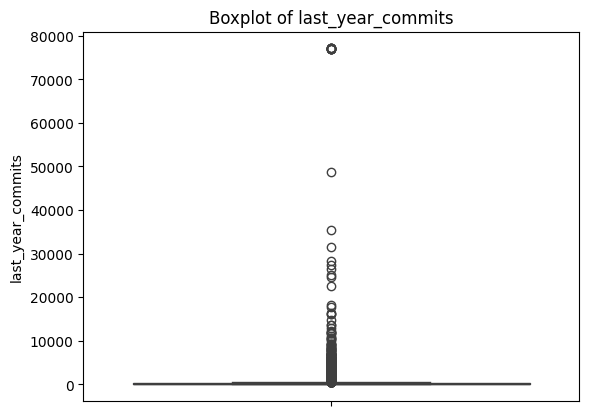


--- contributors ---
Standard Deviation: 114.49
Variance: 13107.44
Minimum: 0
Maximum: 488
Range: 488
1st Quartile (Q1): 13.0
3rd Quartile (Q3): 128.0
IQR (Interquartile Range): 115.0


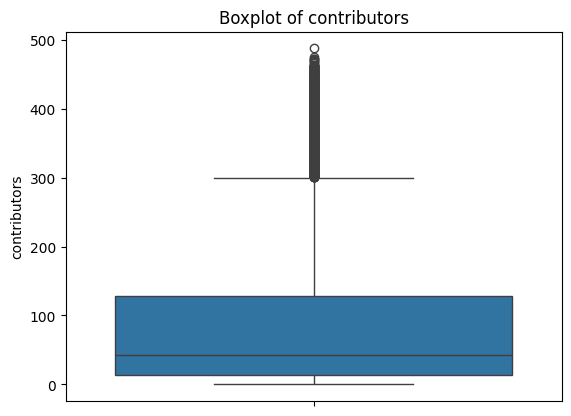


--- closed_issues ---
Standard Deviation: 363.74
Variance: 132309.30
Minimum: 0
Maximum: 2000
Range: 2000
1st Quartile (Q1): 1.0
3rd Quartile (Q3): 108.0
IQR (Interquartile Range): 107.0


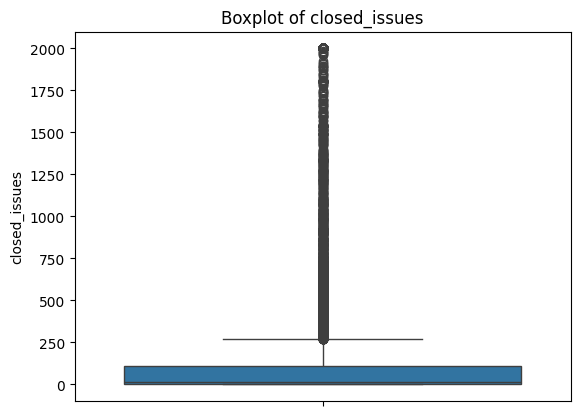


--- pull_requests ---
Standard Deviation: 93.41
Variance: 8725.21
Minimum: 0
Maximum: 5000
Range: 5000
1st Quartile (Q1): 2.0
3rd Quartile (Q3): 24.0
IQR (Interquartile Range): 22.0


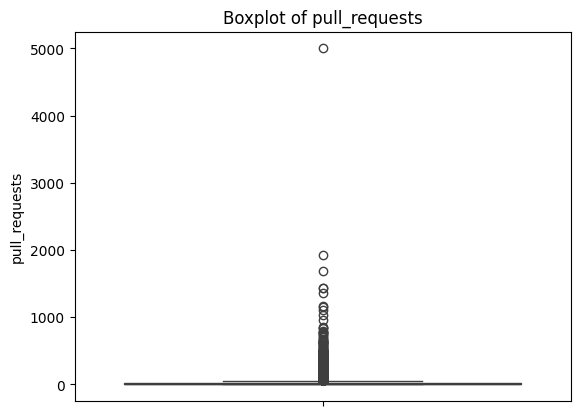

In [28]:
# For each numerical column, calculate dispersion statistics and plot boxplots
for col in numerical_columns:
    print(f"\n--- {col} ---")
    print(f"Standard Deviation: {df[col].std():.2f}")
    print(f"Variance: {df[col].var():.2f}")
    print(f"Minimum: {df[col].min()}")
    print(f"Maximum: {df[col].max()}")
    print(f"Range: {df[col].max() - df[col].min()}")
    print(f"1st Quartile (Q1): {df[col].quantile(0.25)}")
    print(f"3rd Quartile (Q3): {df[col].quantile(0.75)}")
    print(f"IQR (Interquartile Range): {df[col].quantile(0.75) - df[col].quantile(0.25)}")
    
    # Plot boxplot to visualize spread and detect outliers
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## 🔧 Tratamento Inteligente de Outliers

### Metodologia IQR (Interquartile Range)
Implementação de técnica estatística robusta para detecção e tratamento de valores extremos.

**Processo:**
1. **Cálculo dos Limites:** Q1 - 1.5×IQR e Q3 + 1.5×IQR
2. **Identificação:** Valores fora dos limites
3. **Análise de Impacto:** Porcentagem de outliers por coluna
4. **Tratamento Seletivo:** Substituição por mediana quando ≤15% dos dados

### Critério de Tratamento
**Regra dos 15%:** Outliers são tratados apenas quando representam ≤15% dos dados, preservando distribuições naturalmente assimétricas.

**Benefícios:**
- ✅ Redução de distorções estatísticas
- ✅ Preservação de padrões naturais
- ✅ Melhoria na qualidade de modelos posteriores

In [23]:
import numpy as np

for col in df_copy.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR

    outliers = df_copy[(df_copy[col] < limite_inf) | (df_copy[col] > limite_sup)]
    perc_outliers = len(outliers) / len(df_copy) * 100

    print(f"Coluna: {col} - Outliers: {perc_outliers:.2f}%")

    if perc_outliers <= 15: 
        mediana = df_copy[col].median()
        df_copy[col] = np.where((df_copy[col] < limite_inf) | (df_copy[col] > limite_sup), mediana, df_copy[col])
        print(f" -> Substituídos por mediana")

Coluna: stars - Outliers: 8.83%
 -> Substituídos por mediana
Coluna: forks - Outliers: 9.32%
 -> Substituídos por mediana
Coluna: size_kb - Outliers: 13.21%
 -> Substituídos por mediana
Coluna: open_issues - Outliers: 9.72%
 -> Substituídos por mediana
Coluna: owner_public_repos - Outliers: 10.65%
 -> Substituídos por mediana
Coluna: subscribers_count - Outliers: 8.53%
 -> Substituídos por mediana
Coluna: last_year_commits - Outliers: 13.86%
 -> Substituídos por mediana
Coluna: contributors - Outliers: 9.22%
 -> Substituídos por mediana
Coluna: closed_issues - Outliers: 14.78%
 -> Substituídos por mediana
Coluna: pull_requests - Outliers: 10.71%
 -> Substituídos por mediana


## 📊 Comparação Pré e Pós-Tratamento

### Análise de Impacto
Comparação das distribuições antes e depois do tratamento de outliers.

**Métricas Comparadas:**
- Mudanças nas medidas de tendência central
- Alterações na dispersão
- Impacto visual nas distribuições

### Validação do Tratamento
Verificação da eficácia das técnicas aplicadas através de:
- Boxplots comparativos
- Histogramas antes/depois
- Estatísticas descritivas atualizadas


--- stars ---
Mean: 7425.48
Median: 6779.00


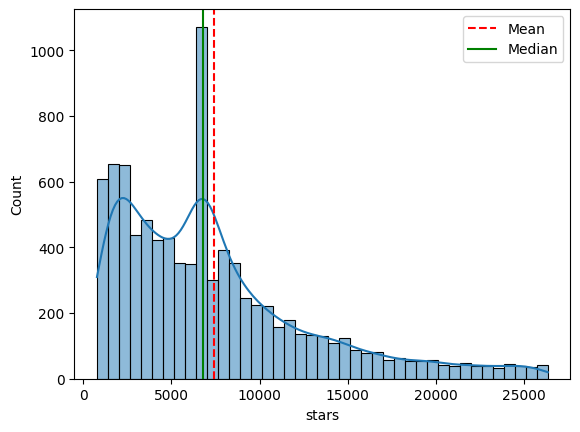


--- forks ---
Mean: 890.83
Median: 716.00


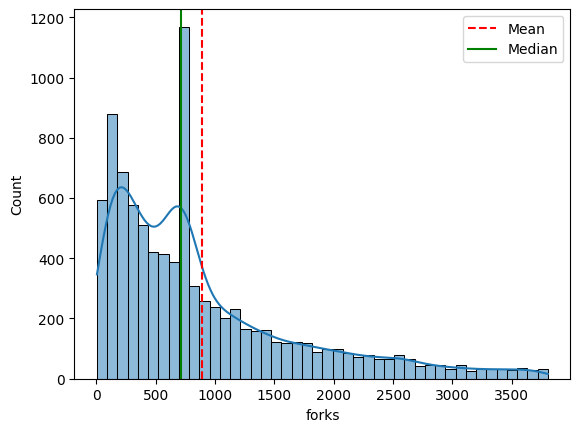


--- size_kb ---
Mean: 24860.97
Median: 14703.00


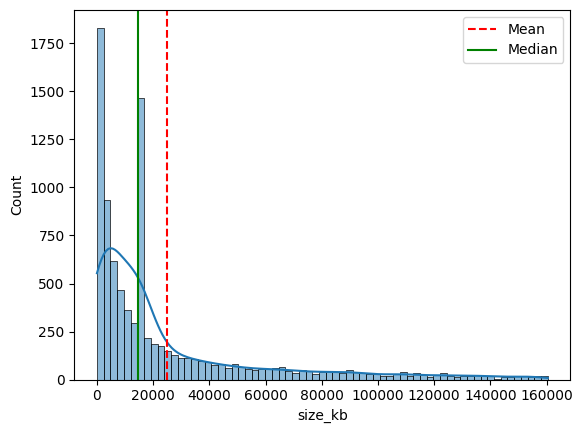


--- open_issues ---
Mean: 102.42
Median: 73.00


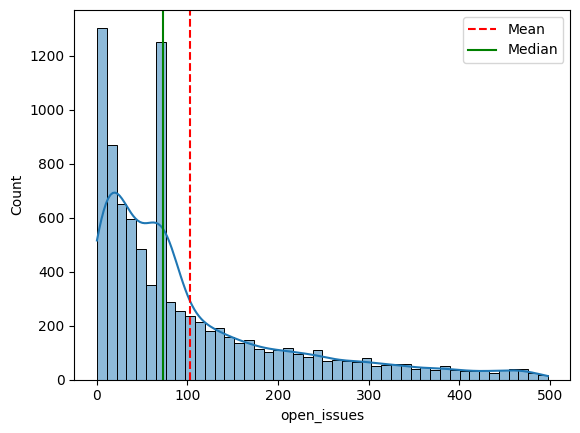


--- owner_public_repos ---
Mean: 47.27
Median: 38.00


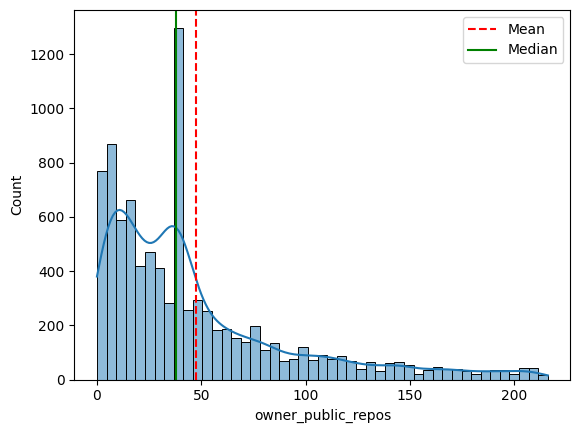


--- subscribers_count ---
Mean: 130.46
Median: 106.00


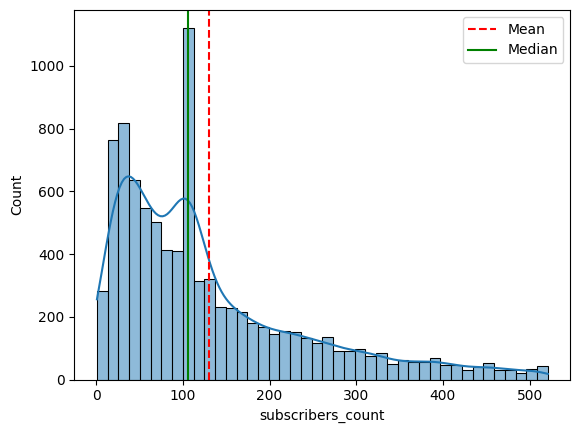


--- last_year_commits ---
Mean: 73.30
Median: 25.00


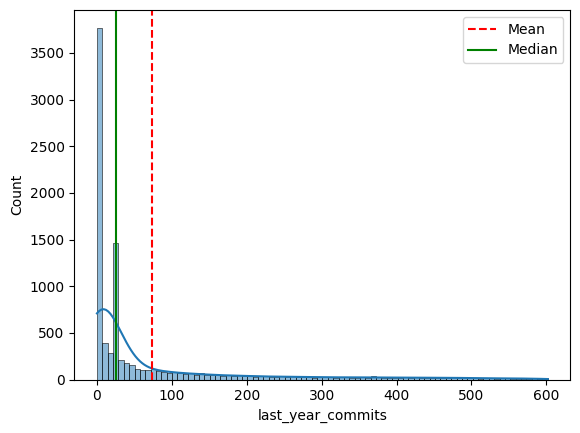


--- contributors ---
Mean: 62.11
Median: 43.00


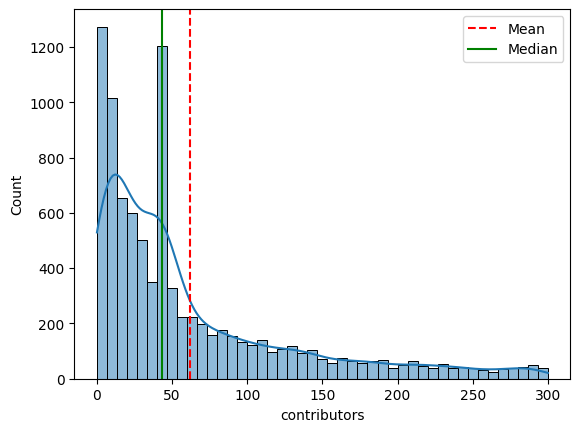


--- closed_issues ---
Mean: 32.49
Median: 13.00


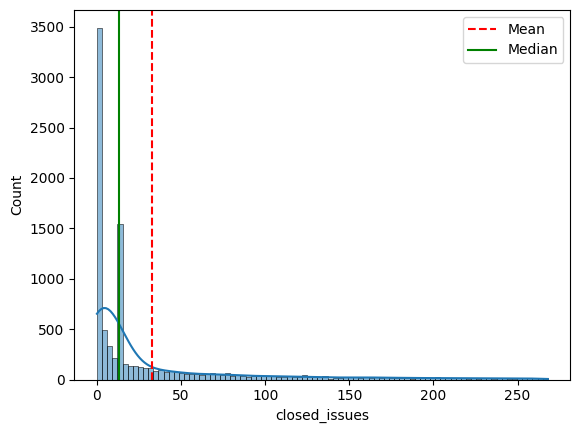


--- pull_requests ---
Mean: 11.20
Median: 8.00


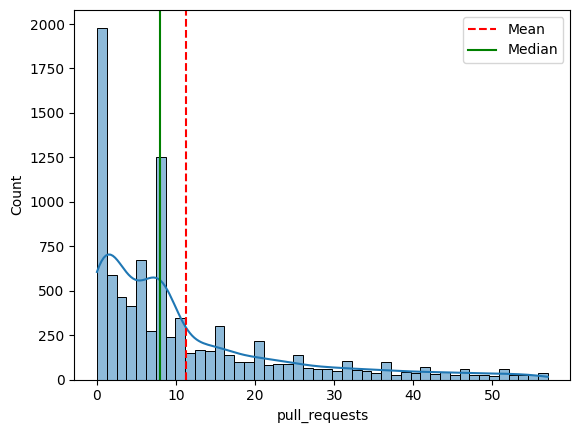

In [24]:
# For each numerical column, calculate and plot the mean and median
for col in numerical_columns:
    print(f"\n--- {col} ---")
    print(f"Mean: {df_copy[col].mean():.2f}")
    print(f"Median: {df_copy[col].median():.2f}")
    
    # Plot histogram with KDE for distribution
    sns.histplot(df_copy[col], kde=True)
    
    # Add mean and median lines
    plt.axvline(df_copy[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df_copy[col].median(), color='g', linestyle='-', label='Median')
    plt.legend()
    plt.show()


--- stars ---
Standard Deviation: 5528.50
Variance: 30564316.78
Minimum: 773.0
Maximum: 26359.0
Range: 25586.0
1st Quartile (Q1): 3146.0
3rd Quartile (Q3): 9714.0
IQR (Interquartile Range): 6568.0


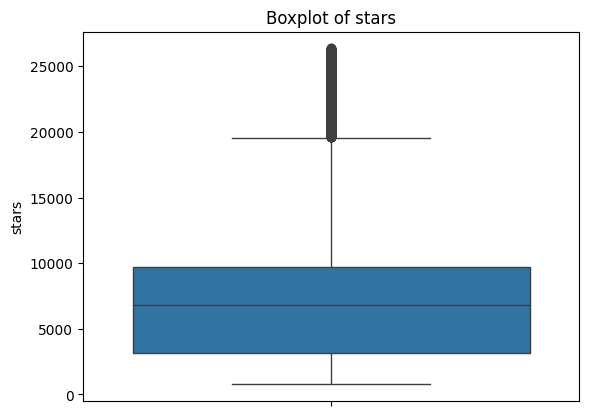


--- forks ---
Standard Deviation: 818.03
Variance: 669171.32
Minimum: 4.0
Maximum: 3804.0
Range: 3800.0
1st Quartile (Q1): 279.0
3rd Quartile (Q3): 1193.0
IQR (Interquartile Range): 914.0


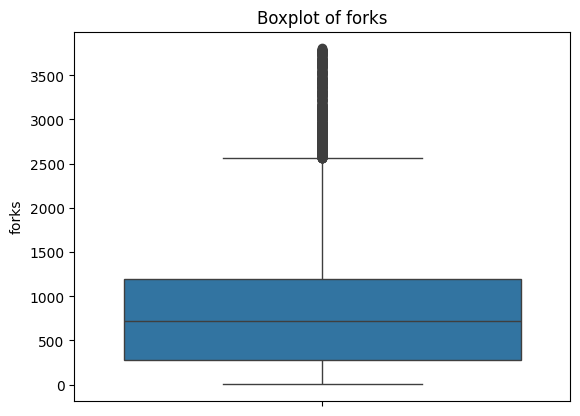


--- size_kb ---
Standard Deviation: 33409.65
Variance: 1116204910.02
Minimum: 0.0
Maximum: 160483.0
Range: 160483.0
1st Quartile (Q1): 3490.0
3rd Quartile (Q3): 28713.0
IQR (Interquartile Range): 25223.0


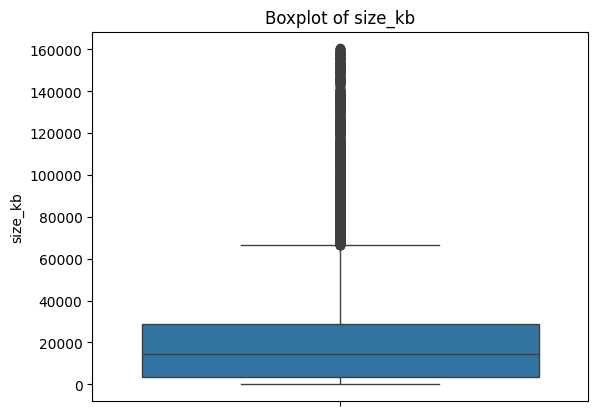


--- open_issues ---
Standard Deviation: 109.89
Variance: 12075.05
Minimum: 0.0
Maximum: 498.0
Range: 498.0
1st Quartile (Q1): 23.0
3rd Quartile (Q3): 138.0
IQR (Interquartile Range): 115.0


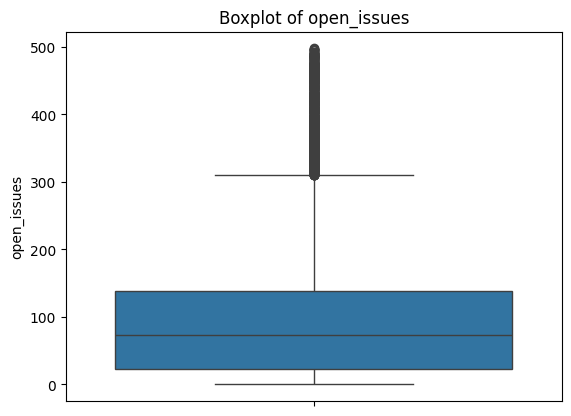


--- owner_public_repos ---
Standard Deviation: 46.22
Variance: 2136.20
Minimum: 0.0
Maximum: 216.0
Range: 216.0
1st Quartile (Q1): 14.0
3rd Quartile (Q3): 62.0
IQR (Interquartile Range): 48.0


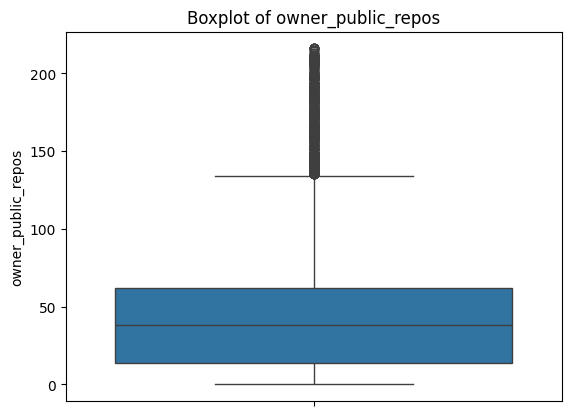


--- subscribers_count ---
Standard Deviation: 112.24
Variance: 12597.42
Minimum: 1.0
Maximum: 521.0
Range: 520.0
1st Quartile (Q1): 46.0
3rd Quartile (Q3): 176.0
IQR (Interquartile Range): 130.0


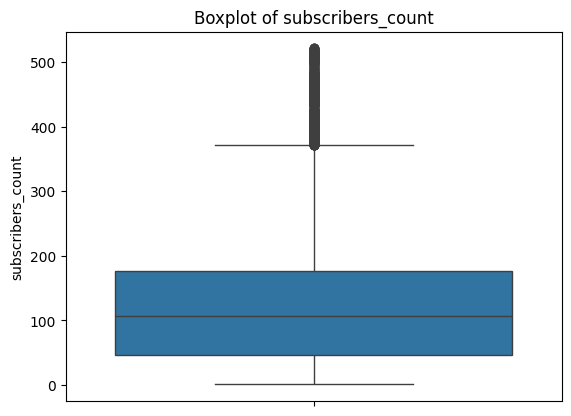


--- last_year_commits ---
Standard Deviation: 127.42
Variance: 16234.81
Minimum: 0.0
Maximum: 602.0
Range: 602.0
1st Quartile (Q1): 0.0
3rd Quartile (Q3): 75.0
IQR (Interquartile Range): 75.0


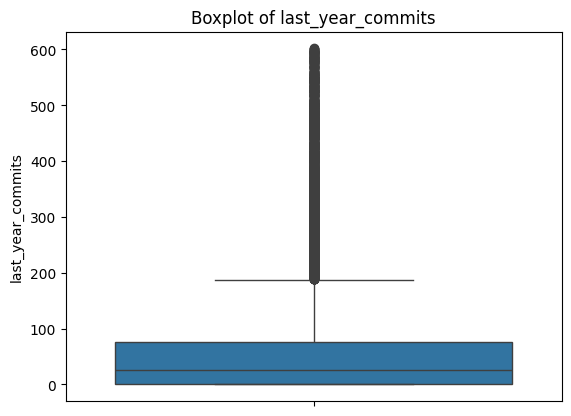


--- contributors ---
Standard Deviation: 68.24
Variance: 4657.16
Minimum: 0.0
Maximum: 300.0
Range: 300.0
1st Quartile (Q1): 13.0
3rd Quartile (Q3): 83.0
IQR (Interquartile Range): 70.0


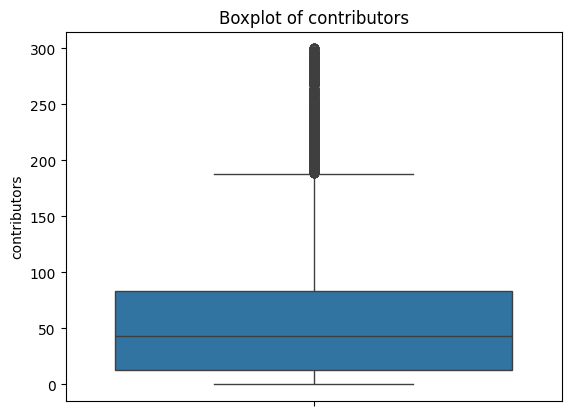


--- closed_issues ---
Standard Deviation: 55.02
Variance: 3027.28
Minimum: 0.0
Maximum: 268.0
Range: 268.0
1st Quartile (Q1): 1.0
3rd Quartile (Q3): 33.0
IQR (Interquartile Range): 32.0


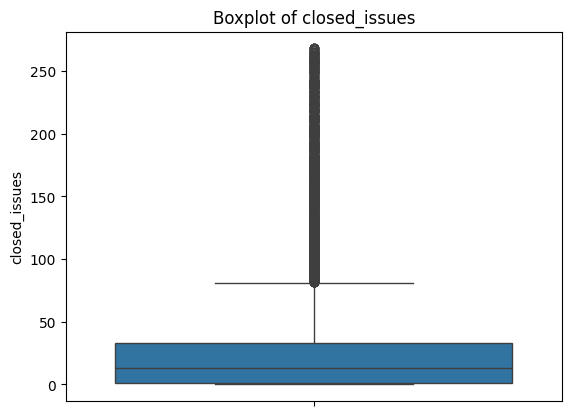


--- pull_requests ---
Standard Deviation: 12.71
Variance: 161.57
Minimum: 0.0
Maximum: 57.0
Range: 57.0
1st Quartile (Q1): 2.0
3rd Quartile (Q3): 15.0
IQR (Interquartile Range): 13.0


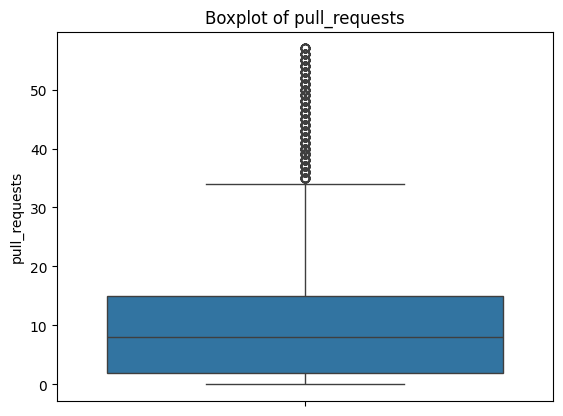

In [25]:
# For each numerical column, calculate dispersion statistics and plot boxplots
for col in numerical_columns:
    print(f"\n--- {col} ---")
    print(f"Standard Deviation: {df_copy[col].std():.2f}")
    print(f"Variance: {df_copy[col].var():.2f}")
    print(f"Minimum: {df_copy[col].min()}")
    print(f"Maximum: {df_copy[col].max()}")
    print(f"Range: {df_copy[col].max() - df_copy[col].min()}")
    print(f"1st Quartile (Q1): {df_copy[col].quantile(0.25)}")
    print(f"3rd Quartile (Q3): {df_copy[col].quantile(0.75)}")
    print(f"IQR (Interquartile Range): {df_copy[col].quantile(0.75) - df_copy[col].quantile(0.25)}")
    
    # Plot boxplot to visualize spread and detect outliers
    sns.boxplot(data=df_copy[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## 💾 Dataset Otimizado para Modelagem

Exportação do dataset tratado e otimizado para análises avançadas.

**Arquivo Gerado:** `data_set_repositorios_mediana.csv`
**Melhorias Obtidas:**
- ✅ Outliers tratados estatisticamente
- ✅ Distribuições mais simétricas
- ✅ Dados preparados para machine learning
- ✅ Preservação de padrões naturais

In [26]:
df_copy.to_csv('../dados/data_set_repositorios_mediana.csv', index=False)